In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df_origin = pd.read_csv("./Data/D_train.csv")

In [33]:
df = df_origin.iloc[:,:-3] #Last 3 columns are almost nothing
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 35 columns):
Class    13500 non-null int64
User     13500 non-null int64
X0       13500 non-null float64
Y0       13500 non-null float64
Z0       13500 non-null float64
X1       13500 non-null float64
Y1       13500 non-null float64
Z1       13500 non-null float64
X2       13500 non-null float64
Y2       13500 non-null float64
Z2       13500 non-null float64
X3       13464 non-null float64
Y3       13464 non-null float64
Z3       13464 non-null float64
X4       13254 non-null float64
Y4       13254 non-null float64
Z4       13254 non-null float64
X5       11363 non-null float64
Y5       11363 non-null float64
Z5       11363 non-null float64
X6       9616 non-null float64
Y6       9616 non-null float64
Z6       9616 non-null float64
X7       7191 non-null float64
Y7       7191 non-null float64
Z7       7191 non-null float64
X8       5733 non-null float64
Y8       5733 non-null float64
Z8     

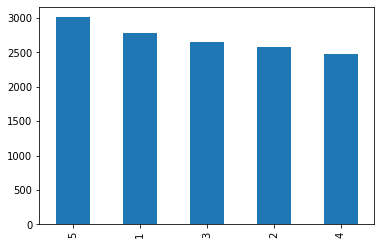

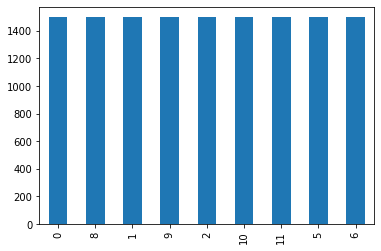

In [3]:
df['Class'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()
df['User'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [15]:
df_dropna = df.copy()
df_dropna.dropna(axis=0, inplace=True)
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 10 to 13488
Data columns (total 35 columns):
Class    2482 non-null int64
User     2482 non-null int64
X0       2482 non-null float64
Y0       2482 non-null float64
Z0       2482 non-null float64
X1       2482 non-null float64
Y1       2482 non-null float64
Z1       2482 non-null float64
X2       2482 non-null float64
Y2       2482 non-null float64
Z2       2482 non-null float64
X3       2482 non-null float64
Y3       2482 non-null float64
Z3       2482 non-null float64
X4       2482 non-null float64
Y4       2482 non-null float64
Z4       2482 non-null float64
X5       2482 non-null float64
Y5       2482 non-null float64
Z5       2482 non-null float64
X6       2482 non-null float64
Y6       2482 non-null float64
Z6       2482 non-null float64
X7       2482 non-null float64
Y7       2482 non-null float64
Z7       2482 non-null float64
X8       2482 non-null float64
Y8       2482 non-null float64
Z8       2482 non-null floa

In [ ]:
class_df = df2['Class']
user_df = df2['User']
fig, ax = plt.subplots(figsize=(5,8))
ax.scatter(class_df, user_df)
plt.show()
#Seems each individual user has posed all gestures

In [34]:
a1 = df.iloc[:,np.arange(2,35,3)].apply(np.mean,axis=1)
a2 = df.iloc[:,np.arange(3,36,3)].apply(np.mean,axis=1)
a3 = df.iloc[:,np.arange(4,37,3)].apply(np.mean,axis=1)
res = pd.DataFrame({'X_mean':a1,'Y_mean':a2,'Z_mean':a3})
res.insert(0,'Class',df['Class'])
res.insert(1,'User',df['User'])

In [35]:
res.insert(5,'X_std',df.iloc[:,np.arange(2,35,3)].apply(np.std,axis=1))
res.insert(6,'Y_std',df.iloc[:,np.arange(3,36,3)].apply(np.std,axis=1))
res.insert(7,'Z_std',df.iloc[:,np.arange(4,37,3)].apply(np.std,axis=1))

In [36]:
res.insert(8,'X_min',df.iloc[:,np.arange(2,35,3)].apply(np.min,axis=1))
res.insert(9,'Y_min',df.iloc[:,np.arange(3,36,3)].apply(np.min,axis=1))
res.insert(10,'Z_min',df.iloc[:,np.arange(4,37,3)].apply(np.min,axis=1))
res.insert(11,'X_max',df.iloc[:,np.arange(2,35,3)].apply(np.max,axis=1))
res.insert(12,'Y_max',df.iloc[:,np.arange(3,36,3)].apply(np.max,axis=1))
res.insert(13,'Z_max',df.iloc[:,np.arange(4,37,3)].apply(np.max,axis=1))

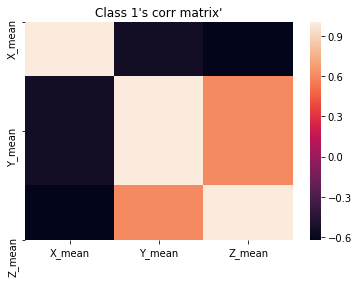

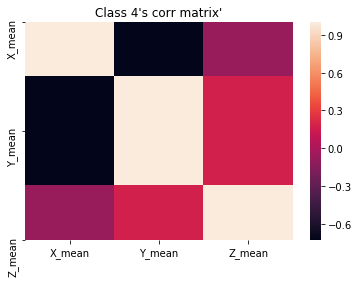

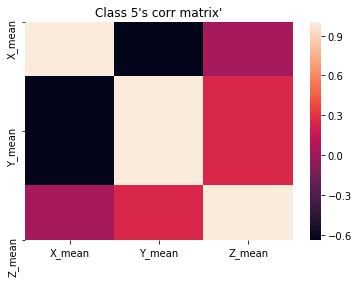

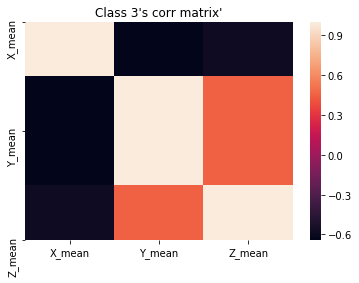

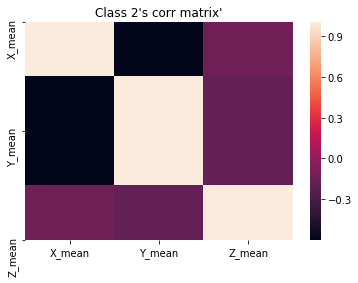

In [9]:
for i in res['Class'].unique():
    sns.heatmap(res.loc[res['Class']==i].iloc[:,2:5].corr())
    plt.title("Class {}'s corr matrix'".format(i))
    plt.show()
# res.loc[res['User']==2].corr()['Y_max']
# res['Class'].unique()

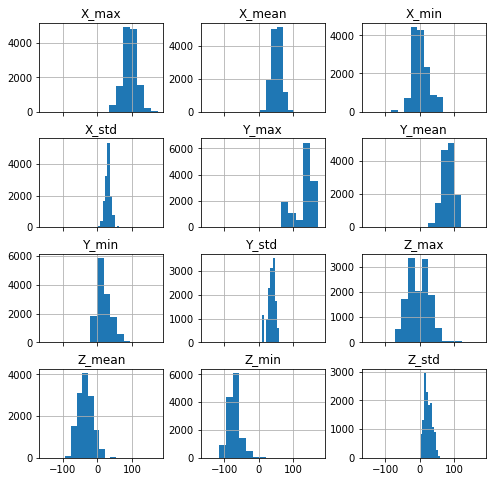

,X_mean,Y_mean,Z_mean,X_std,Y_std,Z_std,X_min,Y_min,Z_min,X_max,Y_max,Z_max
count,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000
mean,51.251302,80.373621,-34.503680,30.255553,36.974195,24.385289,1.818376,18.048175,-69.979004,93.476938,130.757534,-2.775697
std,14.693086,17.246827,20.997457,8.007331,11.190146,11.497603,22.985188,20.406169,17.959632,20.850893,26.737334,30.435922
min,-61.898213,-50.301817,-92.767794,1.877569,2.545291,2.080092,-121.182089,-98.233756,-151.592200,-27.857612,-39.663200,-72.571532
25%,39.890656,67.838747,-49.998885,25.430178,30.795146,16.001879,-13.215606,3.874427,-83.301733,78.941544,127.423988,-25.165756
50%,52.488576,81.495304,-36.156457,31.336960,38.893965,23.595284,-3.355784,13.191128,-68.827678,92.440150,139.227723,-2.521009
75%,62.079082,94.251337,-18.156529,34.134948,44.182668,32.168509,13.176117,26.791033,-60.953941,108.646575,149.616753,16.989548
max,102.433624,136.535435,70.051134,69.833732,65.277341,58.156458,68.288056,95.296677,40.474604,174.054403,170.209350,122.569627


In [19]:
res.iloc[:,2:].hist(figsize=(8,8), sharex=True)
plt.show()
res.iloc[:,2:].describe()

In [28]:
# PCA, check the scree plot and variance sum
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(res.iloc[:,2:])
pca.explained_variance_ratio_[:6].sum()
pca.components_

array([[ 0.04607372, -0.2885593 , -0.42083952, -0.09310158, -0.08433164,
        -0.17593181,  0.22912897, -0.09011618, -0.09230294, -0.14154584,
        -0.44902896, -0.63243184],
       [-0.3732932 ,  0.18386086,  0.1014863 , -0.00141894, -0.26437973,
        -0.11007863, -0.40103765,  0.48427719,  0.21384212, -0.46951579,
        -0.26171523, -0.06714128],
       [-0.03770625, -0.27379261,  0.00716138,  0.15964192, -0.09205383,
         0.1963527 , -0.43837324, -0.31266975, -0.2992969 ,  0.11253222,
        -0.57242872,  0.36221607],
       [ 0.20419906, -0.22755587,  0.37095038, -0.09447021, -0.11928199,
        -0.07202502,  0.43809802,  0.09588034,  0.53731383,  0.07652462,
        -0.41663416,  0.26703439],
       [-0.02296588, -0.08794292,  0.03267573,  0.27768538,  0.0574727 ,
        -0.32354675, -0.44647568, -0.16762858,  0.50152301,  0.47546338,
         0.07027198, -0.30920438],
       [-0.24635388, -0.2548152 ,  0.17715963, -0.16136427,  0.2850778 ,
        -0.02614263, -

In [31]:
# We pick the first 6 eigenvectors
pca = PCA(n_components=6)
res_pca = pca.fit_transform(res.iloc[:,2:])
after_pca = pd.DataFrame(data=res_pca, columns = ['1','2','3','4','5','6'])
after_pca

,1,2,3,4,5,6
0,80.803375,-8.018573,-2.799130,15.283954,-6.063840,-9.424119
1,35.769591,43.417085,-16.898710,-53.994718,-17.781492,12.900612
2,-11.232235,17.657224,12.917469,-27.621777,-22.098324,-6.717234
3,46.217752,-19.727657,-38.361676,4.686685,-21.667123,6.967712
4,19.502917,52.557799,-37.965385,-26.644931,-15.192068,-0.067863
...,...,...,...,...,...,...
13495,-23.931707,-29.702768,-8.874625,14.506381,2.848446,-0.931392
13496,-31.667945,14.946287,3.082346,-25.803905,20.791752,11.743399
13497,-25.280466,-27.732109,-8.849702,13.808928,4.380055,-1.154310
13498,35.269095,22.514251,1.714447,13.965473,1.124355,5.730900


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X_dropped = res.drop('Class', axis=1)
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = res['Class']
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)
print(grid.best_score_, grid.best_params_)

learning from 13500 rows


C:\Users\Yan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7547407407407407 {'n_neighbors': 4}


In [46]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,params,error_score=0.)
    grid.fit(X, y)
    print("Best Accuracy: {}".format(grid.best_score_))
    print("Best Parameters: {}".format(grid.best_params_))
    print("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

params = {
    'preprocessing__pca__n_components':[6],
    'svm__C':[0.1,0.5,1,10,50,100,500,1000],
    'svm__gamma':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50]}

preprocessing = Pipeline([('scale', StandardScaler()),
                          ('pca', PCA())])
motion_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                                  ('svm', SVC(kernel='rbf'))])


In [48]:
X_dropped = res.drop('Class', axis=1)
y_dropped = res['Class']
get_best_model_and_accuracy(motion_pipeline, params, X_dropped, y_dropped)

C:\Users\Yan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Accuracy: 0.36666666666666664
Best Parameters: {'preprocessing__pca__n_components': 6, 'svm__C': 1000, 'svm__gamma': 50}
Average Time to Fit (s):3.522
Average Time to Score (s):1.013
